In [ ]:
pip install git+https://github.com/scikit-learn-contrib/py-earth@v0.2dev

  Cloning https://github.com/scikit-learn-contrib/py-earth (to revision v0.2dev) to /tmp/pip-req-build-sn58_l7f
  Running command git clone -q https://github.com/scikit-learn-contrib/py-earth /tmp/pip-req-build-sn58_l7f
  Running command git checkout -b v0.2dev --track origin/v0.2dev
  Switched to a new branch 'v0.2dev'
  Branch 'v0.2dev' set up to track remote branch 'v0.2dev' from 'origin'.
  Created wheel for sklearn-contrib-py-earth: filename=sklearn_contrib_py_earth-0.1.0+16.g400f84d-cp37-cp37m-linux_x86_64.whl size=3997257 sha256=3f84444b363db780210ef59131344942115617c267097c72c154f4d57f8a1ddb
  Stored in directory: /tmp/pip-ephem-wheel-cache-v4wbg828/wheels/79/d7/aa/1e418a9aea84424ef2ce2697ae7cccace322976388d3692e8e
Successfully built sklearn-contrib-py-earth


In [ ]:
import pandas as pd
from numpy import mean
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.datasets import make_regression
from sklearn.metrics import accuracy_score
from pyearth import Earth
import matplotlib.pyplot as plt

import os
data = pd.read_csv("parkinsons_updrs.data.csv")

In [ ]:
train, test = train_test_split(data, train_size=0.7, random_state=123)

In [ ]:
#create fake regression data
X, y = make_regression(n_samples=5875, n_features=22, n_informative=15,
                       noise=0.5, random_state=5)

In [ ]:
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import cross_val_predict  # For K-Fold Cross Validation
from sklearn.metrics import r2_score  # For find accuracy with R2 Score
from sklearn.metrics import mean_squared_error  # For MSE
from math import sqrt  # For squareroot operation

model = Earth(max_degree=2, penalty=1.0, minspan_alpha = 0.01, endspan_alpha = 0.01, endspan=5) #2nd degree formula is necessary to see interactions, penalty and alpha values for making model simple

model.fit(x_train, y_train)
model.score(x_train, y_train)

y_pred_mars_train = model.predict(x_train)
y_pred_mars_test = model.predict(x_test)

accuracy_mars_train = r2_score(y_train, y_pred_mars_train)
print("Training Accuracy for Multivariate Adaptive Regression Spline: ", accuracy_mars_train)

accuracy_mars_test = r2_score(y_test, y_pred_mars_test)
print("Testing Accuracy for Multivariate Adaptive Regression Spline: ", accuracy_mars_test)

RMSE_mars_train = sqrt(mean_squared_error(y_train, y_pred_mars_train))
print("RMSE for Training Data: ", RMSE_mars_train)

RMSE_mars_test = sqrt(mean_squared_error(y_test, y_pred_mars_test))
print("RMSE for Testing Data: ", RMSE_mars_test)

Training Accuracy for Multivariate Adaptive Regression Spline:  0.9997382643327313
Testing Accuracy for Multivariate Adaptive Regression Spline:  0.9997358656964946
RMSE for Training Data:  3.0599831379322344
RMSE for Testing Data:  3.0792135758150376


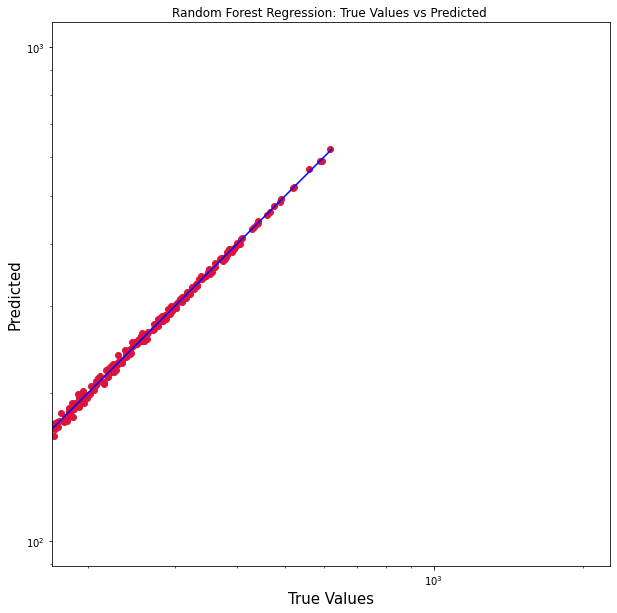

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred_mars_test, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred_mars_test), max(y_test))
p2 = min(min(y_pred_mars_test), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predicted', fontsize=15)
plt.title("Random Forest Regression: True Values vs Predicted ")
plt.axis('equal')
plt.show()